# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
# 데이터 로드
data = pd.read_csv("./abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [3]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [4]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [9]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [13]:
#릿지모델 생성 및 훈련
ridge_reg=Ridge(alpha=0.3)
ridge_reg.fit(X_train, y_train)

#예측값 구하기
pred_ridge=ridge_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age=1.5+pred_ridge

#MSE와 RMSE구하기
mse=mean_squared_error(y_test, pred_ridge)
rmse=np.sqrt(mse)
print(f'mse: {mse} \nrmse: {rmse}')

mse: 5.102054480468203 
rmse: 2.2587727819478


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [14]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [16]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
  ridge = Ridge(alpha = alpha)

  #cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge,X_train,y_train,scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE:{1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE:2.219
alpha 0.1 일 때 5 folds 의 평균 RMSE:2.205
alpha 1 일 때 5 folds 의 평균 RMSE:2.186
alpha 10 일 때 5 folds 의 평균 RMSE:2.323
alpha 100 일 때 5 folds 의 평균 RMSE:2.576


-> alpha 1일때, 모델 성능이 가장 좋음.

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [18]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [21]:
#모델 생성 및 훈련
xgbr=XGBRegressor()
xgbr.fit(X_train, y_train)
#예측값 구하기
pred_xgb=xgbr.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age=pred_xgb+1.5

#MSE와 RMSE 구하기
mse=mean_squared_error(y_test, pred_xgb)
rmse=np.sqrt(mse)
print(f'mse: {mse} \nrmse: {rmse}')

mse: 5.909033046943901 
rmse: 2.4308502724240135


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

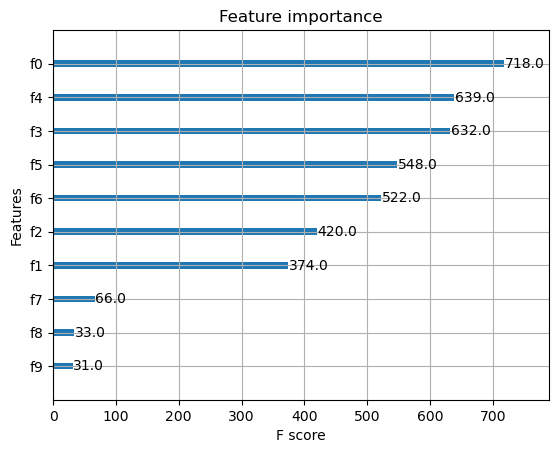

In [23]:
import seaborn as sns
%matplotlib inline

from xgboost import plot_importance
plot_importance(xgbr) 

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [24]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [37]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [38]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [39]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [40]:
#기울기
lr.coef_

array([[-1.99751296e-01,  3.65451000e-01,  1.49472294e-01,
        -1.88027183e-01, -2.28494848e-02,  1.95456712e-01,
         4.66701799e-01, -1.66796824e-02,  8.23898088e-02,
         6.75012730e-02, -1.92622020e-02,  2.94916091e-01,
         7.42522760e-03],
       [ 5.96476354e-01, -7.88673589e-01, -1.26181598e-01,
         2.12254484e-01, -1.13504260e-02,  3.15786277e-01,
         3.55148390e-01,  3.34675851e-02,  2.79035983e-01,
        -1.17202616e+00,  2.61165971e-01,  4.64732069e-01,
        -8.33633621e-03],
       [-3.96725058e-01,  4.23222589e-01, -2.32906963e-02,
        -2.42273011e-02,  3.41999107e-02, -5.11242989e-01,
        -8.21850189e-01, -1.67879027e-02, -3.61425792e-01,
         1.10452489e+00, -2.41903769e-01, -7.59648160e-01,
         9.11108611e-04]])

In [41]:
#절편
lr.intercept_

array([-0.04177841,  0.09551055, -0.05373214])

3-3) 모델의 정확도를 구하세요.

In [43]:
#모델의 예측값 구하기
pred=lr.predict(x_test)

#모델의 정확도 구하기
acc=metrics.accuracy_score(y_test, pred)
acc

0.9629629629629629